### optimistic_initial_values

Compared with Epsilon-Greedy, It has better preformance.

https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python/learn/v4/t/lecture/6399956?start=0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Bandit:
    def __init__(self, m):
        """
        param: m True mean
        """
        self.m = m # True mean which is predefined 
        self.mean = 10 # estimate of the bandit's mean
        self.N = 0
    
    def pull(self):
        return np.random.rand() + self.m
    
    def update(self, x):
        """
        param: x Latest sample received from bandit.
        """
        self.N += 1
        self.mean = (1.-1./self.N)*self.mean + 1./self.N*x

In [3]:
def run_experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

    data = np.empty(N)

    for i in range(N):
        # Greedy startegy
        j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        data[i] = x

    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)

    return cumulative_average


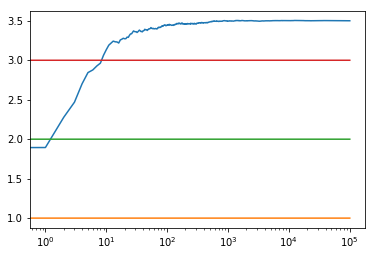

1.2114874274456078
2.5772428154621965
3.5004439656728485


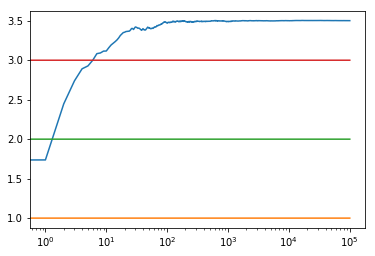

1.1623919602244568
2.3117365904225577
3.5011063193019125


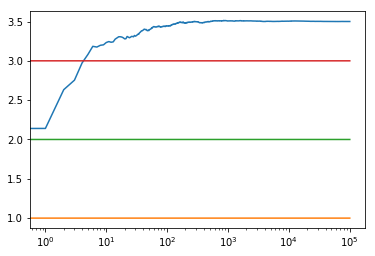

1.4491135689692118
2.8318614535573614
3.500181598029876


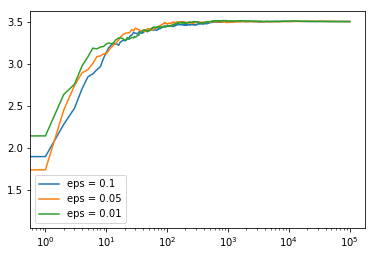

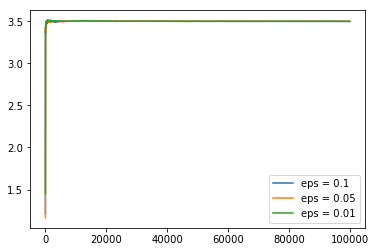

In [4]:
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

# log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()


# linear plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.show()
